    Importing Libraries 

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from pandas.core.common import random_state
from sklearn.metrics._regression import root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor
import pickle

Loading Dataset

In [2]:
train_data=pd.read_csv("train.csv")
test_data=pd.read_csv("test.csv")

Dataset Info

In [3]:
print(train_data.info())
print(train_data.describe())
print(train_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Missing Values


In [4]:
missing_values=train_data.isnull().sum()
print(missing_values[missing_values>0])

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


Visualizing The Dataset


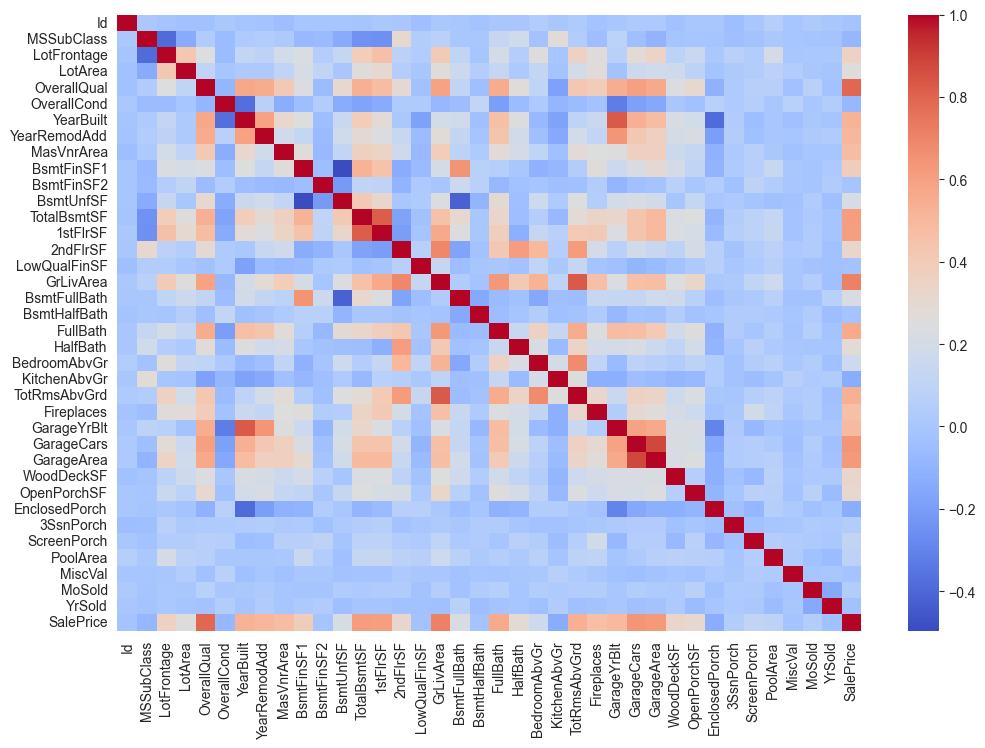

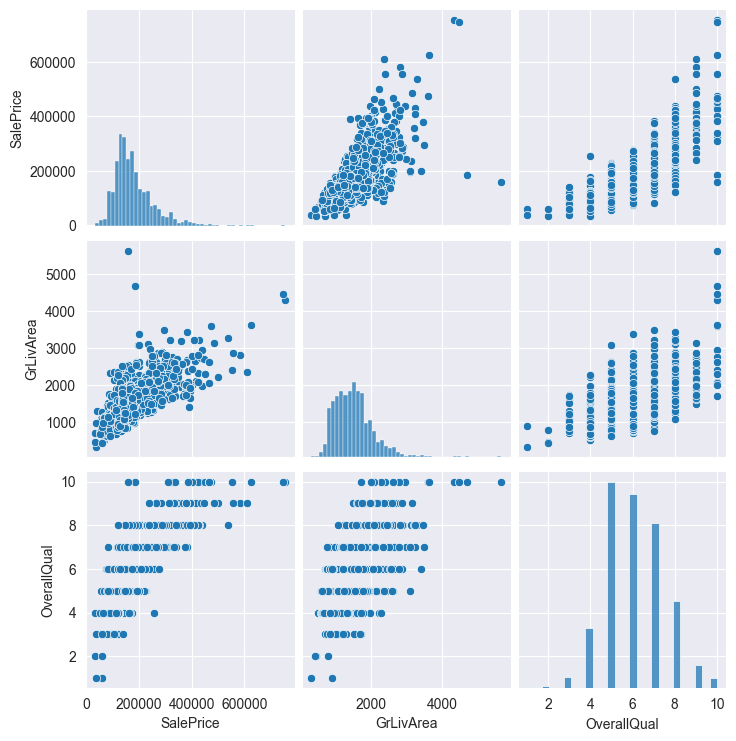

In [5]:
numerical_data=train_data.select_dtypes(include=['float64','int64'])
plt.figure(figsize=(12,8))
sb.heatmap(numerical_data.corr(),annot=False,cmap="coolwarm")
sb.pairplot(train_data, vars=["SalePrice", "GrLivArea", "OverallQual"])

plt.show()

Encoding categorical values(red, green) which does not mean anything to model


In [6]:
train_data=pd.get_dummies(train_data,drop_first=True)
test_data=pd.get_dummies(test_data,drop_first=True)

Filling NAN values with median of database


In [7]:
train_data.fillna(train_data.median(),inplace=True)
test_data.fillna(test_data.median(),inplace=True)

Making sure the columns match in both dataset


In [8]:
train_data,test_data=train_data.align(test_data,join="left",axis=1)
test_data.fillna(0,inplace=True)

Feature Selection



x=train_data.drop("3SsnPorch",axis=1)
y=train_data['3SsnPorch']

"""
from sklearn.ensemble import RandomForestRegressor

model=RandomForestRegressor()
model.fit(x,y)
feature_importance=pd.Series(model.feature_importances_,index=x.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.show()
"""

Splitting the databse


In [23]:
x = train_data.drop('SalePrice', axis=1)  
y = train_data['SalePrice']
print(y.median())
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.2,random_state=42)


163000.0


Train a baseline Linear Regression model:


In [10]:
regresser=LinearRegression()
regresser.fit(x_train,y_train)


LinearRegression()

Predict on validation data:


In [11]:
y_pred=regresser.predict(x_val)
print(y_pred)

[ 159859.60675125  348018.36498688   83487.74607697  175104.91846631
  326629.29928129   68399.0626955   233151.48141242  147031.02552991
   63846.85472524  151457.63439569  142738.74621122  103392.54250928
   75697.5403259   219322.01816152  172804.21989721  132278.1966799
  185593.70205065  125684.3856472   131748.15425898  215044.36931895
  162276.84050521  203919.18413927  171988.9510973   126828.09316369
  198775.35527145  136395.83917532  193346.30797445  102245.95735785
  175567.73108556  204208.88898462  154657.09464067  276669.89077321
  243388.78317029  108315.36472904  238821.94571261  148227.79408411
  134590.9766216   200829.43470392  309872.02919622  122336.92513954
  118578.94738334  218804.29051741  101459.52721924  368381.05134926
  129464.62883467  135901.28460753   94261.02638646  142840.70832242
  419860.96660802  133666.69819825  118385.94013148  258808.63530482
   98620.98760543  291772.89978219  161385.36319484  246241.53322592
  194016.41515406  162958.58506517 

Calculate performance metrics (Mean Squared Error or R² Score):

In [15]:
mse=mean_squared_error(y_val,y_pred)
r2=r2_score(y_val,y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 2429423922.5289965
R² Score: 0.6832698040596218


 Predict on Test Data

In [14]:
test_data = test_data.drop("SalePrice", axis=1)

regresser.fit(x,y)
predictions=regresser.predict(test_data)
print("Predictions for test data:", predictions)


Predictions for test data: [-534831.56569245 -487046.28033931 -458686.24115964 ... -468935.22928835
 -530940.77382419 -422597.66631373]


Random Forest Regressor Model

In [21]:
rfmodel=RandomForestRegressor(n_estimators=100,random_state=42)
rfmodel.fit(x_train,y_train)
pred=rfmodel.predict(x_val)
print(f"Root Mean Squared Errorfor the model is:{root_mean_squared_error(y_val,pred)}")
print(f"R² Score for the model is:{r2_score(y_val,pred)}")

Mean Squared Errorfor the model is:842112968.885585
R² Score for the model is:0.8902115834269836


Saving the RF model

In [25]:
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(rfmodel, file)
print("Random Forest model saved successfully!")

Random Forest model saved successfully!
